Переписываю предыдущую логику в bayes.Inference.py

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np

import moments
# In demographic_models.py, we've defined a custom model for this problem
import demographic_models

import gadma

import GPy
from GPyOpt.methods import BayesianOptimization

import matplotlib.pyplot as plt

import sys  
sys.path.insert(0, './bayes')
import Inference as Inf

In [3]:
# Load the data
data = moments.Spectrum.from_file('YRI_CEU.fs')

In [4]:
upper_bound = np.array([100, 100, 100, 10, 3, 3])
lower_bound = np.array([1e-2, 1e-2, 1e-2, 0, 0, 0])

In [5]:
def draw(is_log, bo):
#     bo.plot_acquisition()
    bo.plot_convergence()
    
    x_opt = np.exp(bo.x_opt) if is_log else bo.x_opt
    x_str = np.array2string(x_opt, precision=3, separator=', ', max_line_width=np.inf)
    print(f"The minumum value obtained by the function was {-bo.fx_opt:.4f} \nx = {x_str}")

In [6]:
func = demographic_models.prior_onegrow_mig

In [7]:
bo = Inf.optimize_bayes(data, func, lower_bound, upper_bound, 
                        max_iter=2,
                        kern_func_name='Matern52',
                        output_log_file='BOtmp.log')

In [8]:
# import gadma

# gadma.Inference.optimize_ga(6, data, func,
#                             size_of_generation_in_ga=10,
#                             lower_bound=lower_bound,
#                             upper_bound=upper_bound,
#                             output_log_file='GAtmp.log'
#                            )

<IPython.core.display.Javascript object>


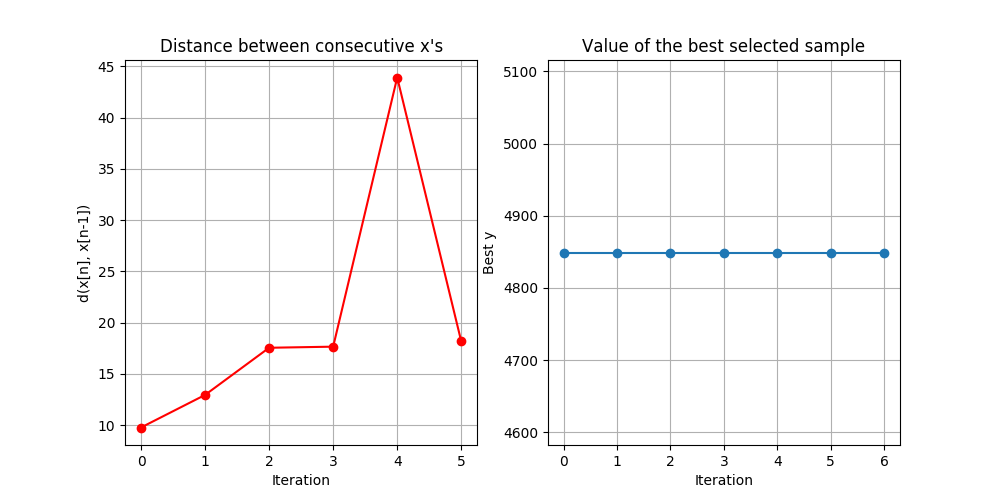

The minumum value obtained by the function was -4848.9896 
x = [3.120e+00, 4.106e-01, 2.779e-01, 1.114e-01, 3.267e-07, 3.446e-01]


In [9]:
%matplotlib notebook
draw (True, bo)